In [63]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

## Задача

У нас есть набор данных: знания о длине тормозного пути и скорости для трёх автомобилей.

|D|V|
|-|-|
|10|60|
|7|50|
|12|75|

Напишите через запятую оценки коэффициентов линейной регрессии $D$ на $V$, т.е. $\beta_0\ \beta_1$ модели $D=\beta_0+\beta_1 V$  с точностью до трёх знаков после точки.



### Первый способ

На семинаре были следующие формулы для $\beta_0\ \beta_1$

$$  $$

In [64]:
def MySum( x, y ):
    
    Sum = 0.0
    
    M = x.shape[ 0 ]
    
    for i in np.arange( 0, M, 1 ):
        
        Sum += x[ i ] * y[ i ]
        
    return Sum

In [65]:
D = np.asarray( [ 10., 7., 12. ] )

V = np.asarray( [ 60., 50., 75. ] )

M = D.shape[ 0 ]

E = np.ones( M )

betta0 = ( MySum( D, E ) * MySum( V ** 2, E ) - MySum( D, V ) * MySum( V, E ) ) / ( ( M + 1 ) * MySum( V ** 2, E ) - MySum( V, E ) ** 2 )

betta1 = ( ( M + 1 ) * MySum( V, D ) - MySum( D, E ) * MySum( V, E ) ) / ( ( M + 1 ) * MySum( V ** 2, E ) - MySum( V, E ) ** 2 )

In [66]:
print( 'Значение параметров =', betta0, betta1 )

Значение параметров = -0.1755424063116371 0.16055226824457594


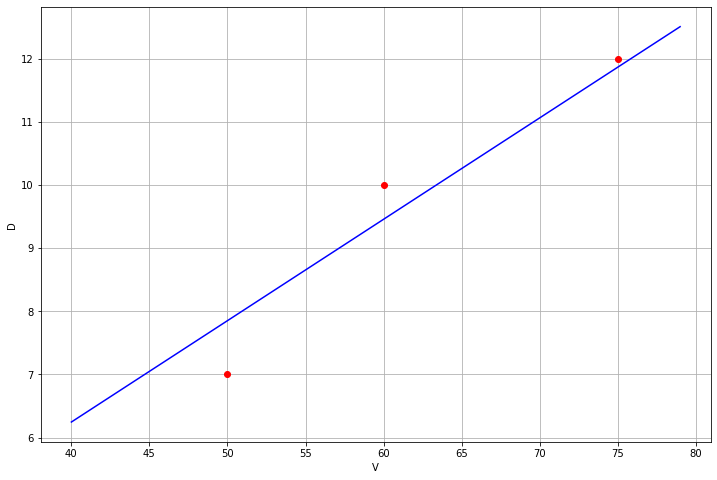

In [67]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'V' )
plt.ylabel( r'D' )

Vx = np.arange( 40., 80., 1. )
Dy = betta0 + betta1 * Vx

plt.plot( V, D, 'ro' )
plt.plot( Vx, Dy, 'b-'  )

### Второй способ

$$ \vec{D} = X \vec{\beta} $$

где матрица $ X $ имеет следующий вид 
$$ X = \begin{pmatrix}
1 & 60. \\
1 & 50. \\
1 & 75.
\end{pmatrix} $$

Тогда для нахождения вектора $ \beta $ необходимо решить уравнение

$$ \vec{ \beta } = ( X^T X )^{-1} X^T \vec{D} $$

In [68]:
X = np.asarray( [ [ 1., 1., 1. ], [ 60., 50., 75. ] ] ).transpose()

X

array([[ 1., 60.],
       [ 1., 50.],
       [ 1., 75.]])

In [69]:
R = np.dot( np.linalg.inv( np.dot( X.transpose(), X ) ), X.transpose() )

In [70]:
Beta = np.dot( R, D.reshape( 3, 1 ) )

In [71]:
print( 'Значение параметров =', float( Beta[ 0 ] ), float( Beta[ 1 ] ) )

Значение параметров = -2.342105263157915 0.1947368421052632


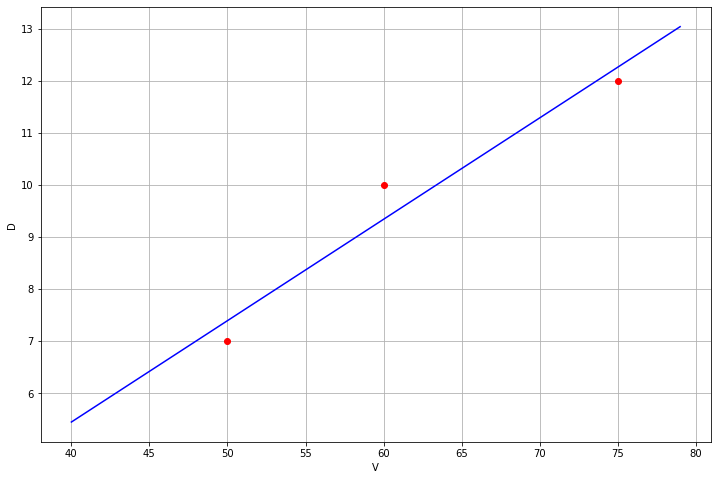

In [72]:
plt.figure( figsize = ( 12, 8 ) )
plt.grid()
plt.xlabel( r'V' )
plt.ylabel( r'D' )

Vx = np.arange( 40., 80., 1. )
Dy = Beta[ 0 ] + Beta[ 1 ] * Vx

plt.plot( V, D, 'ro' )
plt.plot( Vx, Dy, 'b-'  )